In [ ]:
# Import required Python packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns  # Optional for better visuals
from google.colab import files
from sklearn.preprocessing import StandardScaler

In [ ]:
# Upload 'b5.csv' file
uploaded = files.upload()

# Load the dataset
df = pd.read_csv("b5.csv")
df.head()

Saving b5.csv to b5.csv


E1  E2  E3  E4  E5  E6  E7  E8  E9  E10  ...  O1  O2  O3  O4  O5  O6  O7  \
0   4   2   5   2   5   1   4   3   5    1  ...   4   1   3   1   5   1   4   
1   2   2   3   3   3   3   1   5   1    5  ...   3   3   3   3   2   3   3   
2   5   1   1   4   5   1   1   5   5    1  ...   4   5   5   1   5   1   5   
3   2   5   2   4   3   4   3   4   4    5  ...   4   3   5   2   4   2   5   
4   3   1   3   3   3   1   3   1   3    5  ...   3   1   1   1   3   1   3   

   O8  O9  O10  
0   2   5    5  
1   1   3    2  
2   5   5    5  
3   2   5    5  
4   1   5    3  

[5 rows x 50 columns]

In [ ]:
# Step 1: Standardize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [ ]:
# Step 2: Calculate covariance matrix
cov_matrix = np.cov(df_scaled.T)

In [ ]:
# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [ ]:

# Step 4: Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

In [ ]:
# Step 5: Select top k eigenvectors and project the data (2D)
k2 = 2
top_k2_eigenvectors = eigenvectors_sorted[:, :k2]
df_pca_2d = df_scaled.dot(top_k2_eigenvectors)
df_pca_2d = pd.DataFrame(df_pca_2d, columns=[f'PC{i+1}' for i in range(k2)])

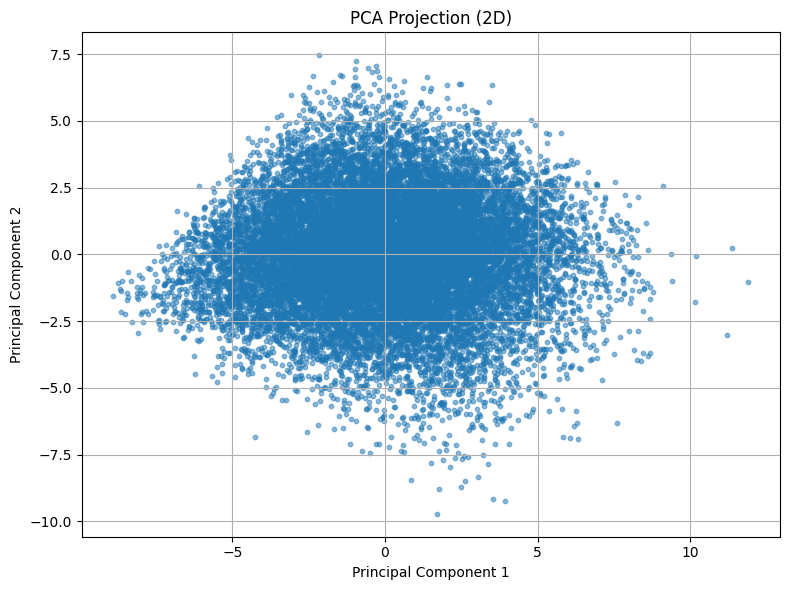

In [ ]:
# Step 6: Visualize 2D PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_2d['PC1'], df_pca_2d['PC2'], alpha=0.5, s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (2D)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Total sum of all eigenvalues
total_variance = np.sum(eigenvalues_sorted)

# Variance explained by each principal component
variance_explained = eigenvalues_sorted / total_variance

# Print variance explained by PC1, PC2, PC3
for i in range(3):
    print(f"PC{i+1} explains {variance_explained[i]*100:.2f}% of the total variance.")


PC1 explains 16.10% of the total variance.
PC2 explains 9.25% of the total variance.
PC3 explains 7.53% of the total variance.
